<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create one or more visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [2]:
import zipfile
import pandas as pd

# Using the zipfile library here ensures that we will not have to delete
# an an unpackaged CSV or use GitHub Large File Storage prior to pushing
# this notebook to GitHub.
zf = zipfile.ZipFile("../module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip")
df = pd.read_csv(zf.open("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"))

print(df.shape)
df.head()

(28332, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [3]:
import spacy
nlp = spacy.load("en_core_web_lg")

STOP_WORDS = nlp.Defaults.stop_words.union(['amazon', 'Amazon'])

tokens = []

for doc in nlp.pipe(df["reviews.text"]):
    
    doc_tokens = []
    
    for token in doc:
        if ((token.text.lower() not in STOP_WORDS) & (token.pos_ != "PRON")) & (token.is_punct != True):
            doc_tokens.append(token.lemma_.strip())
    
    tokens.append(doc_tokens)

In [4]:
len(tokens) == len(df["reviews.text"])

True

In [5]:
import gensim
from gensim import corpora

id2word = corpora.Dictionary(tokens)
len(id2word.keys())

9702

In [7]:
# I presume that the number of topics will likely
# corrospond with the categories column in the 
# DataFrame.

len(df.categories.value_counts())

60

In [11]:
# 60 topics seemed way too high,
# so I decided to use CoherenceModel
# to determine a better number.

# From the lecture notes:

from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute u_mass coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=12)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [12]:
coherence_values = compute_coherence_values(dictionary=id2word, 
                                            corpus=corpora,
                                            start=3, 
                                            limit=40, 
                                            step=2,
                                            passes=1)

In [34]:
topic_coherence = pd.DataFrame.from_records(coherence_values)
topic_coherence[2:].loc[topic_coherence[2:]["coherence_score"] == topic_coherence[2:]["coherence_score"].max()]

,pass,num_topics,coherence_score
8,0,19,-2.387142


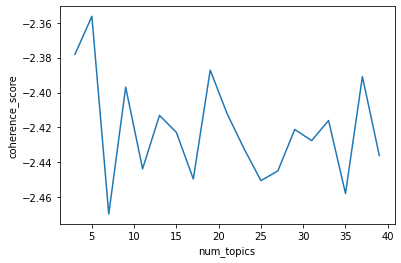

In [21]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In [35]:
from gensim.models.ldamulticore import LdaMulticore

# 19 topics ultimately matched the best coherence rating.
corpora = [id2word.doc2bow(doc) for doc in tokens]
lda = LdaMulticore(corpus=corpora,
                   id2word=id2word,
                   num_topics=19,
                   passes=50)

lda.print_topics()

[(0,
  '0.121*"case" + 0.082*"awesome" + 0.063*"little" + 0.060*"5" + 0.058*"phone" + 0.036*"reading" + 0.031*"service" + 0.029*"show" + 0.025*"come" + 0.025*"build"'),
 (1,
  '0.091*"8" + 0.050*"picture" + 0.049*"grandson" + 0.048*"camera" + 0.042*"7" + 0.040*"storage" + 0.035*"sale" + 0.032*"pleased" + 0.031*"purchase" + 0.026*"age"'),
 (2,
  '0.041*"charge" + 0.027*"buy" + 0.020*"month" + 0.020*"day" + 0.020*"try" + 0.020*"store" + 0.019*"problem" + 0.017*"come" + 0.017*"work" + 0.016*"week"'),
 (3,
  '0.253*"love" + 0.111*"old" + 0.088*"year" + 0.082*"buy" + 0.042*"son" + 0.042*"daughter" + 0.031*"Fire" + 0.027*"get" + 0.022*"2" + 0.022*"wife"'),
 (4,
  '0.119*"screen" + 0.114*"kindle" + 0.031*"version" + 0.028*"big" + 0.027*"new" + 0.026*"size" + 0.026*"travel" + 0.025*"email" + 0.022*"clear" + 0.022*"large"'),
 (5,
  '0.297*"good" + 0.093*"price" + 0.038*"buy" + 0.037*"quality" + 0.033*"well" + 0.032*"far" + 0.019*"cheap" + 0.015*"low" + 0.015*"cost" + 0.014*"deal"'),
 (6,
  '0.1

In [36]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [37]:
pyLDAvis.gensim.prepare(lda, corpora, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
8      0.021202 -0.042076       1        1  9.785503
2      0.147774 -0.154816       2        1  9.114524
3      0.126316 -0.225425       3        1  8.083036
5     -0.152938 -0.100691       4        1  7.262226
12     0.123531 -0.054002       5        1  6.728423
7     -0.076975 -0.019236       6        1  6.620060
18     0.126814  0.029763       7        1  6.460837
13     0.091758  0.017796       8        1  5.757895
15    -0.313602 -0.062181       9        1  5.103264
4      0.086525  0.084010      10        1  4.818900
14    -0.099338  0.113005      11        1  4.388047
16     0.115666  0.186438      12        1  4.268341
11    -0.216329 -0.077464      13        1  4.037080
1      0.093510 -0.072209      14        1  3.431659
6      0.115395 -0.193273      15        1  3.320379
10     0.033345  0.239759      16        1  2.782959
9      0.017166  0.160137      17        1  2.780754
0      0.049984  0.148549      18        1  2.685731
17    -0.289806  0.021916      19        1  2.570393, topic_info=           Term         Freq        Total Category  logprob  loglift
4       battery  9137.000000  9137.000000  Default  30.0000  30.0000
33         good  7805.000000  7805.000000  Default  29.0000  29.0000
22        great  9831.000000  9831.000000  Default  28.0000  28.0000
86         love  6655.000000  6655.000000  Default  27.0000  27.0000
90          use  5534.000000  5534.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
22        great   864.973450  9831.317383  Topic19  -2.2699   1.2305
176     compare    61.211800   396.594971  Topic19  -4.9183   1.7925
9       quality    85.335670  1277.964233  Topic19  -4.5860   0.9547
151  definitely    48.006813   544.830627  Topic19  -5.1613   1.2320
924       prime    26.406357   295.285889  Topic19  -5.7590   1.2468

[1012 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1553      5  0.990130      +
1391     14  0.987569    1/2
207       1  0.080335     10
207       3  0.425109     10
207       5  0.324689     10
...     ...       ...    ...
98        3  0.921430   year
1106      7  0.002801  young
1106     13  0.994273  young
1453     16  0.996650     yr
1846     11  0.899560   zone

[1381 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 3, 4, 6, 13, 8, 19, 14, 16, 5, 15, 17, 12, 2, 7, 11, 10, 1, 18])

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling